# Pohyb s jedným stupněm volnosti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

from celluloid import Camera
from IPython.display import HTML
from base64 import b64encode

## Stupně volnosti

> **Stupeň volnosti** (DOF, degrees of freedom) je v mechanice počet nezávislých parametrů, které definují konfiguraci mechanického systému. Jinými slovy, je to počet nezávislých pohybů, které může těleso vykonávat.

* V ploše má bod dva stupně volnosti 
    * posun podél osy x a podél osy y
* V ploše má těleso pak tři stupně volnosti 
    * posun podél osy x, osy y
    * otočení kolem bodu.
* V prostoru má bod tři stupně volnosti
    * posuny podél os x, y, z 
* V trojrozměrném prostoru má tuhé těleso 6 stupňů volnosti:
    * 3 posuvné (pohyb podél os x, y, z)
    * 3 rotační (rotace kolem os x, y, z)

> **Vazba** je omezení, které omezuje nebo zakazuje některé stupně volnosti tělesa. 

# Poloha bodu

Pomocí metod motion capture můžeme získat trajektorii bodů lidského těla v čase. Pro popis pohybu musíme tuto trajektorii nějakým
způsobem vyjádřit, kvantifikovat. 

Pro další popis budeme vycházet z definice pohybu. Samotnou změnu fyzikální veličiny označujeme v mechanice symbolem $\Delta$. Například pro změnu času označíme jako $\Delta t$. Znamená to:
$$\Delta t = t_2 - t_1$$ 

Začneme-li pohyb v čase 12 hodin 20 minut a ukočníme ho v čase 12 hodin 21 minut, trval daný pohyb 1 minutu. S popisem změny polohy je to o něco komplikovanější vzhledem k rzodělení pohybu. Kůli jednoduchosti budeme uvažovat nejjednodušší způsob měření pohybu u pohybu posuvného a rotačného.

## Přímočarý pohyb

### Translační pohyb

Za nejjednodušší posuvný pohyb budeme považovat pohyb běžce po přímé dráze. Jakým způsobem by jsme mohli určit jeho polohu? Příkladem může být původní měření běhu.

![Běh pohyb](https://www.fasttalklabs.com/wp-content/uploads/2023/08/analyze-run-form.jpg)

### Souřadnicová osa
* **Počátek souřadnic:** Zvolený bod na přímce, od kterého měříme vzdálenosti.
* **Kladný směr:** Směr, ve kterém rostou kladné hodnoty souřadnice.
* **Záporný směr:** Směr opačný ke kladnému směru.

![souřadnicová osa](https://df0b18phdhzpx.cloudfront.net/ckeditor_assets/pictures/1439925/original_13.png)

### Poloha bodu
* **Souřadnice:** Číselná hodnota udávající vzdálenost bodu od počátku souřadnic ve zvoleném směru. V případě pohybu po přímce nám stačí jedna hodnota $x$.

### Změna polohy
* **Posunutí:** Změna polohy bodu v čase. Je to vektorová veličina, která má velikost (dráhu) a směr. Označujeme jí $\vec{\mathbf{d}}$.

### Rychlost
* **Rychlost:** Určuje, jak rychle se bod pohybuje. Vypočítá se jako podíl změny dráhy a času.

$$\vec{\mathbf{v{} = \frac{\Delta \vec{\mathbf{x}}{\Delta t}$$

* **Průměrná rychlost:** Celková dráha dělená celkovým časem.

$$\vec{v_p} = \frac{x}{t}$$

* **Okamžitá rychlost:** Rychlost v daném okamžiku.

### Zrychlení
* **Zrychlení:** Určuje, jak se mění rychlost bodu v čase.

  $$\vec{a} = \frac{\Delta v}{\Delta t}$$

### Zápis pohybu

Možný zápis pohybu je tabulkou, kde vyjádříme jednotlivé body

|Čas $t$ \[s\] | Poloha $x$ [m]|
--- | --- |
| 0 | 1 |
| 1 | 3 |
| 2 | 5 |
| 3 | 5 |
| 4 | 2 |

Zobrazení pomocí tabulky může být nepřehledné když máme velké množství bodů. Proto je výhodnější po popis polohy použít graf

## Kinematika bodu

## Kinematika

**Kinematika** je odvětví klasické mechaniky, které popisuje pohyb objektů bez uvážení příčin pohybu ([Wikipedia](http://en.wikipedia.org/wiki/Kinematics)).

Kinematika částice je popis pohybu, když je objekt považován za částici.

Částice jako fyzický objekt v přírodě neexistuje; je to zjednodušení pro pochopení pohybu tělesa nebo je to pojmová definice, jako je těžiště soustavy objektů.

**Dráha, rychlost a zrychlení** jsou tři základní veličiny popisující pohyb tělesa. Mezi nimi existují úzké vztahy, které nám umožňují popsat a analyzovat pohyb tělesa.

### Dráha
* **Dráha** je délka trajektorie, kterou urazí těleso při svém pohybu. Je to skalární veličina a značí se obvykle písmenem *s*.

## Rychlost

Průměrná rychlost mezi dvěma okamžiky je:
$$\overrightarrow{\mathbf{v_x}}(t) = \frac{\overrightarrow{\mathbf{x}}(t_2)-\overrightarrow{\mathbf{x}}(t_1)}{t_2-t_1} = \frac{\Delta \overrightarrow{\mathbf{x}}}{\Delta t}$$

Okamžitá rychlost částice se získá, když se $\Delta t$ přiblíží k nule. 

$$\overrightarrow{\mathbf{v_x}}(t) = \lim_{\Delta t \to 0} \frac{\Delta \overrightarrow{\mathbf{x}}}{\Delta t} = \lim_{\Delta t \to 0} \frac{\overrightarrow{\mathbf{x}}(t+\Delta t)-\overrightarrow{\mathbf{r}}(t)}{\Delta t} = \frac{\mathrm{d}\overrightarrow{\mathbf{x}}}{\mathrm{d}t} = \dot{\vec{\mathbf{x}}}$$

> V mechanice se často setkáváme s časovými derivacemi, tedy derivacemi funkcí, které závisí na čase. Pro zjednodušení zápisu a usnadnění práce s těmito derivacemi se používá speciální značení pomocí teček nad symbolem veličiny. Toto značení zavedl **Isaac Newton**.
> * **První časová derivace:** Značí se jednou tečkou nad symbolem veličiny. Například, pokud $x$ značí polohu, pak $\dot{x}$ (x s tečkou) značí její první časovou derivaci, tedy rychlost:
   $$\dot{x} = \frac{dx}{dt}$$
> * **Druhá časová derivace:** Značí se dvěma tečkami nad symbolem veličiny. Například, $\ddot{x}$ (x se dvěma tečkami) značí druhou časovou derivaci polohy, tedy zrychlení:
$$\ddot{x} = \frac{d^2x}{dt^2} = \frac{d}{dt}\left(\frac{dx}{dt}\right) = \frac{d\dot{x}}{dt}$$
> * **Třetí a vyšší časové derivace:** Značí se třemi a více tečkami nad symbolem veličiny. Vyšší časové derivace se používají méně často, ale mohou se objevit například při popisu dynamiky pohybu.

### Rychlost je relativní

Rychlost je vždy relativní. To znamená, že se udává vzhledem k nějakému referenčnímu bodu nebo soustavě. Neexistuje absolutní rychlost. Pojďme si to ilustrovat na několika příkladech s ohledem na Zemi, Slunce a centrum naší Galaxie, Mléčné dráhy.

**1. Vzhledem k Zemi:**

* **Chůze:** Člověk jde rychlostí například 5 km/h. Tato rychlost je *vzhledem k povrchu Země*.
* **Auto:** Auto jede rychlostí 100 km/h. Opět, tato rychlost je *vzhledem k Zemi*.
* **Letadlo:** Letadlo letí rychlostí 900 km/h. Tato rychlost je *vzhledem k Zemi*.

V těchto příkladech je Země naše nejpřirozenější referenční soustava. Všichni se pohybujeme po Zemi a proto nám tyto rychlosti dávají největší smysl.

**2. Vzhledem ke Slunci:**

Země obíhá kolem Slunce. To znamená, že i když stojíme na Zemi, pohybujeme se obrovskou rychlostí *vzhledem ke Slunci*.

* **Rychlost Země kolem Slunce:** Přibližně 30 km/s (108 000 km/h). To je mnohem rychleji, než cokoliv, co běžně zažíváme na Zemi. I když sedíte v klidu doma, pohybujete se touto obrovskou rychlostí *vzhledem ke Slunci*.
* **Rychlost sondy Voyager 1 (vzhledem ke Slunci):** Voyager 1, jedna z nejvzdálenějších sond od Země, se pohybuje rychlostí přibližně 17 km/s (61 200 km/h) *vzhledem ke Slunci*.

Zde vidíme, že i relativně "pomalu" se pohybující tělesa (jako Země) mají obrovské rychlosti, pokud změníme referenční soustavu na Slunce.

**3. Vzhledem k centru Galaxie:**

Slunce a celá Sluneční soustava obíhají kolem centra Mléčné dráhy. I zde se pohybujeme obrovskou rychlostí.

* **Rychlost Slunce kolem centra Galaxie:** Přibližně 220 km/s (828 000 km/h). To je ještě mnohem rychlejší než pohyb Země kolem Slunce! I Slunce, obrovská a zdánlivě nehybná hvězda, se řítí vesmírem obrovskou rychlostí *vzhledem k centru Galaxie*.

Zde je Země pouze malou planetou obíhající kolem Slunce, které je jednou z miliard hvězd obíhajících centrum Galaxie. Proto se naše rychlost *vzhledem k centru Galaxie* skládá z rychlosti Země kolem Slunce a rychlosti Slunce kolem centra Galaxie.

**Shrnutí:**

| Vzhledem k | Příklad | Rychlost (přibližně) |
|---|---|---|
| Zemi | Chůze | 5 km/h |
| Rovník | Osa otáčení Země | 1674 km/h |
| Slunci | Země | 108 000 km/h) |
| Centru Galaxie | Slunce | 828 000 km/h) |
|Mléčna dráha| ostatní galaxie | 2.2 miliona km/h|
*Zdroj: [Britannica.com](https://www.britannica.com/story/what-is-earths-velocity)* 

<iframe width="560" height="315" src="https://www.youtube.com/embed/buqtdpuZxvk?si=Dip7gZuaPjByjTCk"></iframe>

### Zrychlení

Zrychlení je změna rychlosti bodu, která může být dána i rychlostí změny polohy druhého řádu. Střední zrychlení mezi dvěma okamžiky je:
$$\overrightarrow{\mathbf{a}}(t) = \frac{\overrightarrow{\mathbf{v}}(t_2)-\overrightarrow{\mathbf{v}}(t_1)}{t_2-t_1} = \frac{\Delta \overrightarrow{\mathbf{v}}}{\Delta t}$$
Podobně okamžité zrychlení je derivace prvního řádu rychlosti nebo derivace druhého řádu polohového vektoru:
$$\overrightarrow{\mathbf{a}}(t) = \frac{\mathrm{d}\overrightarrow{\mathbf{v}}(t)}{\mathrm{d}t} = \frac{\mathrm{d}^2\overrightarrow{\mathbf{x}}(t)}{\mathrm{d}
t^2} = \dot{\vec{\mathbf{v}}} =\ddot{\vec{\mathbf{x}}}$$

### Ryv (Jerk)

**Ryv** (anglicky jerk) je fyzikální veličina, která popisuje **změnu zrychlení v čase**. Udává, jak rychle se zrychlení tělesa mění. Je to vektorová veličina, což znamená, že má velikost a směr.

Ryv se značí písmenem $j$ a jeho definiční vztah je dán derivací zrychlení ($a$) podle času ($t$):

$$
\vec{\mathbf{j}} = \frac{\mathrm{d}\vec{\mathbf{a}}}{\mathrm{d}t} = \frac{\mathrm{d}^3\mathbf{x}}{\mathrm{d}t^3} = \dddot{\vec{\mathbf{x}}}
$$


#### Bod při konstantní rychlosti

$$
\begin{array}{l l}
\overrightarrow{\mathbf{a}}(t) = 0 \\
\overrightarrow{\mathbf{v}}(t) = \overrightarrow{\mathbf{v}}_0 \\
\overrightarrow{\mathbf{r}}(t) = \overrightarrow{\mathbf{r}}_0 + \overrightarrow{\mathbf{v}}_0t
\end{array}
$$

#### Bod při konstantním zrychlení

$$
\begin{array}{l l}
\overrightarrow{\mathbf{a}}(t) = \overrightarrow{\mathbf{a}}_0 \\
\overrightarrow{\mathbf{v}}(t) = \overrightarrow{\mathbf{v}}_0 + \overrightarrow{\mathbf{a}}_0t \\
\overrightarrow{\mathbf{r}}(t) = \overrightarrow{\mathbf{r}}_0 + \overrightarrow{\mathbf{v}}_0t +
\frac{1}{2}\overrightarrow{\mathbf{a}}_0 t^2
\end{array}
$$

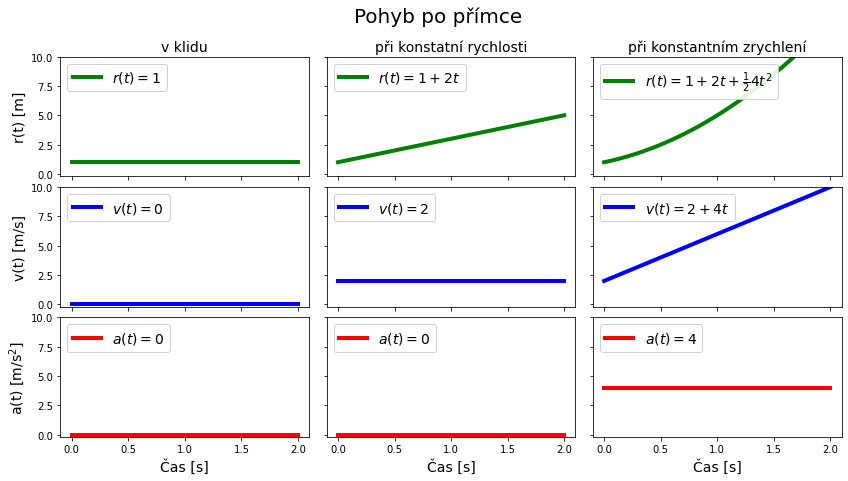

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 2, 101)
r0 = 1
v0 = 2
a0 = 4

plt.rc('axes',  labelsize=14,  titlesize=14) 
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 
f, axarr = plt.subplots(3, 3, sharex = True, sharey = True, figsize=(14,7))
plt.suptitle('Pohyb po přímce', fontsize=20);

tones = np.ones(np.size(t))

axarr[0, 0].set_title('v klidu', fontsize=14);
axarr[0, 0].plot(t, r0*tones, 'g', linewidth=4, label='$r(t)=1$')
axarr[1, 0].plot(t,  0*tones, 'b', linewidth=4, label='$v(t)=0$')
axarr[2, 0].plot(t,  0*tones, 'r', linewidth=4, label='$a(t)=0$')
axarr[0, 0].set_ylabel('r(t) [m]')
axarr[1, 0].set_ylabel('v(t) [m/s]')
axarr[2, 0].set_ylabel('a(t) [m/s$^2$]')

axarr[0, 1].set_title('při konstatní rychlosti');
axarr[0, 1].plot(t, r0*tones+v0*t, 'g', linewidth=4, label='$r(t)=1+2t$')
axarr[1, 1].plot(t, v0*tones,      'b', linewidth=4, label='$v(t)=2$')
axarr[2, 1].plot(t,  0*tones,      'r', linewidth=4, label='$a(t)=0$')

axarr[0, 2].set_title('při konstantním zrychlení');
axarr[0, 2].plot(t, r0*tones+v0*t+1/2.*a0*t**2,'g', linewidth=4,
                 label='$r(t)=1+2t+\\frac{1}{2}4t^2$')
axarr[1, 2].plot(t, v0*tones+a0*t,             'b', linewidth=4,
                 label='$v(t)=2+4t$')
axarr[2, 2].plot(t, a0*tones,                  'r', linewidth=4,
                 label='$a(t)=4$')

for i in range(3): 
    axarr[2, i].set_xlabel('Čas [s]');
    for j in range(3):
        axarr[i,j].set_ylim((-.2, 10))
        axarr[i,j].legend(loc = 'upper left', frameon=True, framealpha = 0.9, fontsize=14)
        
plt.subplots_adjust(hspace=0.09, wspace=0.07)

### Kinematika závodu na 100 m

Příkladem, kde lze analýzu některých aspektů pohybu lidského těla zredukovat na analýzu bodu, je studium biomechaniky běhu na 100 metrů.

Technickou zprávu s kinematickými daty pro světový rekord na 100 m od Usaina Bolta si můžete stáhnout z [website for Research Projects](http://www.iaaf.org/development/research) od Mezinárodní asociace atletických federací.
[Tady je přímý odkaz](http://www.iaaf.org/download/download?filename=76ade5f9-75a0-4fda-b9bf-1b30be6f60d2.pdf&urlSlug=1-biomechanics-report-wc-berlin-2009-sprint). Konkrétně následující tabulka ukazuje údaje pro tři medailisty v tomto závodě:

<br>
<figure><img src="https://github.com/BMClab/BMC/blob/master/images/Berlin2009_100m.png?raw=1" width=700 alt="částečné časy závodu na 100 metrů v Berlíně 2009"/><figcaption><center><i>Obrázek. Údaje od tří medailistů z běhu na 100 m v Berlíně, 2009 (<a href="http://www.iaaf.org/download/download?filename=76ade5f9-75a0-4fda-b9bf-1b30be6f60d2.pdf&urlSlug=1-biomechanics-IAberlin-report-s)">0print report</a>).</i></center></figcaption></figure>

Sloupec **RT** v tabulce výše se týká reakční doby každého sportovce. IAAF má velmi přísné pravidlo o reakční době: každý sportovec s reakční dobou kratší než 100 ms je ze soutěže diskvalifikován! Diskuzi o tomto pravidle naleznete na webu [Reaction Times and Sprint False Starts](http://condellpark.com/kd/reactiontime.htm).

Svou vlastní reakční dobu si můžete změřit jednoduchým způsobem na této webové stránce: [http://www.humanbenchmark.com/tests/reactiontime](http://www.humanbenchmark.com/tests/reactiontime).

Článek [A Kinematics Analysis Of Three Best 100 M Performances Ever](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3661886/) od Krzysztofa a Mera představuje podrobnou kinematickou analýzu závodů na 100 m.

## Vztah mezi dráhou, rychlostí a zrychlením


**Graf dráhy**: Ukazuje, jak se mění poloha tělesa v čase.
**Graf rychlosti**: Ukazuje, jak se mění rychlost tělesa v čase.
**Graf zrychlení**: Ukazuje, jak se mění zrychlení tělesa v čase.

**Při rovnoměrném přímočarém pohybu**: Rychlost je konstantní a dráha je přímo úměrná času, zrychlení je nulové.
**Při rovnoměrně zrychleném přímočarém pohybu:** Rychlost se lineárně zvětšuje s časem a dráha se mění kvadraticky s časem.

**Obecně:** 
* Sklon grafu dráhy určuje velikost rychlosti
* Sklon grafu rychlosti určuje velikost zrychlení
* Plocha pod grafem zrychlení je rovná změně rychlosti
* Plocha po grafem dráhy je rovna změně dráhy

![Vztah poloha, dráha, rychlost](http://hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/imgmech/motslope.png)

## Dynamika

### Newtonovy zákony


1. **První Newtonův zákon** - zákon setrvačnosti.

    > *Corpus omne perseverare in statu suo quiescendi vel movendi uniformiter in directum, nisi quatenus illud a viribus impressis cogitur statum suum mutare.*

    > Jestliže na těleso (hmotu) nepůsobí žádné vnější síly, nebo výslednice sil je 0, pak těleso setrvává v klidu nebo v rovnoměrném přímočarém pohybu.

    Ekvivalentní (srozumitelná a doslovná) formulace zní: Těleso zůstává v klidu nebo rovnoměrném přímočarém pohybu, není-li nuceno vnějšími silami tento stav změnit.

2. **Druhý Newtonův zákon** - zákon síly

    > *Mutationem motus proportionalem esse vi motrici impressae et fieri secundam lineam rectam qua vis illa imprimitur.*

    > Jestliže na těleso (hmotu) působí síla, pak se těleso pohybuje zrychlením, které je přímo úměrné působící síle a nepřímo úměrné hmotnosti tělesa.

    $$\vec{\mathbf{F}} = m  \vec{\mathbf{a}} $$

    $$\vec{\mathbf{F}} = m  \ddot{\vec{\mathbf{x}}} $$

3. **Třetí Newtonův zákon** -  zákon akce a reakce

   > *Actioni contrariam semper et aequalem esse reactionem; sive: corporum duorum actiones in se mutuo semper esse aequales et in partes contrarias dirigi.*
   
   > Proti každé akci vždy působí stejně velká ale opačná reakce ; jinak: vzájemná působení dvou těles jsou vždy stejně velká a míří na opačné strany.

## Kdy je dvojice sil v rovnováze?

Dvojice sil je v rovnováze tehdy, když splňuje následující tři podmínky:

1. **Stejná velikost:** Obě síly musí mít stejnou velikost (velikost vektoru síly).

2. **Opačný směr:** Síly musí působit v opačných směrech. To znamená, že vektory sil musí směřovat proti sobě.

3. **Společná nositelka:** Síly musí působit na těleso v jedné přímce (jejich vektory musí ležet na jedné přímce).

### Důsledky rovnováhy dvojice sil

* **Nulová výslednice:** Vektorový součet obou sil je nulový. To znamená, že dvojice sil nemá žádný posuvný účinek na těleso.
* **Nulový moment:** Moment dvojice sil je také nulový. To znamená, že dvojice sil nemá žádný otáčivý účinek na těleso.

### Příklady

* **Kniha ležící na stole:** Na knihu působí tíhová síla směrem dolů a stejně velká síla stolu směrem nahoru. Tyto dvě síly tvoří dvojici sil v rovnováze.
* **Závodník držící činku:** Závodník působí silou vzhůru, aby vyrovnal tíhovou sílu působící na činku směrem dolů. Tyto dvě síly tvoří dvojici sil v rovnováze.

### Pasivní síly v 1D

* **Tření (F_t)**: Tření je síla, která vzniká mezi dvěma povrchy, které se dotýkají a pohybují proti sobě nebo se snaží o pohyb. Tření vždy působí proti směru pohybu nebo proti směru snahy o pohyb.

    * **Statické tření (F_ts)**: Působí mezi tělesy, která jsou v klidu a brání jim v pohybu.
        ```
        F_ts ≤ μ_s * N
        ```
        kde μ_s je koeficient statického tření a N je normálová síla.

    * **Kinetické tření (F_tk)**: Působí mezi tělesy, která se pohybují proti sobě.
        ```
        F_tk = μ_k * N
        ```
        kde μ_k je koeficient kinetického tření a N je normálová síla.

* **Odpor prostředí (F_o)**: Odpor prostředí (např. odpor vzduchu nebo odpor kapaliny) je síla, která působí proti pohybu tělesa v daném prostředí. Velikost odporu prostředí závisí na rychlosti tělesa a na vlastnostech prostředí.

    * **Odpor vzduchu (pro nízké rychlosti)**:
        ```
        F_o = -b * v
        ```
        kde b je konstanta odporu prostředí a v je rychlost tělesa.

    * **Odpor vzduchu (pro vysoké rychlosti)**:
        ```
        F_o = -1/2 * ρ * C_d * A * v^2
        ```
        kde ρ je hustota prostředí, C_d je součinitel odporu, A je plocha tělesa a v je rychlost tělesa.

### Vlastnosti pasivních sil

* **Působí proti pohybu**: Pasivní síly vždy působí proti směru pohybu nebo proti směru snahy o pohyb.
* **Závisí na podmínkách**: Velikost pasivních sil často závisí na podmínkách, jako je například materiál povrchů (u tření), rychlost tělesa (u odporu prostředí) nebo teplota.
* **Ztráta energie**: Pasivní síly způsobují ztrátu mechanické energie, která se přeměňuje na teplo nebo jiné formy energie.


### Jednoduchá implementace

Začněme seznamem souřadnic $x$, který obsahuje všechny souřadnice polohy systému mezi $t_1$ a $t_2$. Lagrangián a akci systému můžeme zapsat v těchto souřadnicích

## Kinetická a potenciální energie

### Kinetická energie
Kinetická energie je energie spojená s pohybem objektu. Těleso v pohybu má kinetickou energii. Kinetická energie částice o hmotnosti m pohybující se rychlostí v je dána vztahem:
$$E_k = \frac{1}{2} m \vec{\mathbf{v}} \cdot \vec{\mathbf{v}}= \frac{1}{2} m v^2$$

kde $v=|∣\vec{\mathbf{v}}∣|$ je velikost rychlosti. Pro systém částic je celková kinetická energie součtem kinetických energií všech jednotlivých částic:
$$E_k = \sum_i \frac{1}{2} m_i \dot{\vec{\mathbf{r}}}_i \cdot \dot{\vec{\mathbf{r}}}_i = \sum_i \frac{1}{2} m_i v_i^2$$
kde $m_i$ je hmotnost $i$-té částice a $\dot{\vec{\mathbf{r}}_i}$ je její rychlost

### Potenciální energie

Potenciální energie je energie spojená s konfigurací systému objektů. Představuje schopnost konat práci v důsledku polohy objektu v silovém poli. Potenciální energie je často spojena s konzervativními silami. Síla $F$ je konzervativní, pokud práce vykonaná touto silou na částici pohybující se mezi dvěma body nezávisí na dráze.

Potenciální energie $U$ spojená s konzervativní silou $F$ je definována tak, že:
$$\mathbf{\vec{F}} = -\nabla U$$
kde $\nabla$ je operátor gradientu. To znamená, že síla je záporný gradient potenciální energie. Změna potenciální energie mezi dvěma body se rovná záporné práci vykonané konzervativní silou při pohybu mezi těmito body.

Mezi běžné příklady potenciální energie patří:
* **Gravitační potenciální energie:** Pro objekt o hmotnosti m blízko povrchu Země je gravitační potenciální energie:
$$E_p = mgh$$
kde $g$ je zrychlení v důsledku gravitace a $h$ je výška nad referenční úrovní.

* **Elastická potenciální energie:** Pro pružinu s konstantou tuhosti $k$ protaženou nebo stlačenou o vzdálenost $x$ z její rovnovážné polohy je elastická potenciální energie:
$$U_e = \frac{1}{2} k x^2$$

### Práce a energie

Práce $W$ vykonaná výslednou silou na částici, když se pohybuje z bodu A do bodu B, se rovná změně její kinetické energie:
$$ W = \Delta E_k = E_{kB} - E_{kA} $$
Pokud práci konají pouze konzervativní síly, pak můžeme práci spojit i se změnou potenciální energie:
$$ W = -\Delta U = -(U_B - U_A) = U_A - U_B$$
Kombinací těchto vztahů získáme zákon zachování mechanické energie:
$$\Delta T + \Delta U = 0  \quad \text{nebo} \quad T_A + U_A =T_B + U_B$$
To znamená, že celková mechanická energie ($E=T+U$) systému zůstává konstantní, pokud práci konají pouze konzervativní síly.

### Výkon
Výkon ($P$) je definován jako rychlost, s jakou je konána práce nebo se přenáší energie:

$$P = \frac{dW}{dt} = \vec{\mathbf{F}} \cdot \vec{\mathbf{v}}$$

Výkon se měří ve wattech (W), kde 1 W = 1 J/s.

## Pohyb jako optimalizace

Tento přístup začíná veličinou nazývanou akce. Pokud minimalizujete akci, můžete získat cestu nejmenší akce, která představuje cestu, kterou fyzický systém projde prostorem a časem. Obecně řečeno, fyzici k této minimalizaci používají analytické nástroje. Princip minimální akce je variační princip umožňující pro libovolný fyzikální systém předpovědět, jak budou vypadat jeho pohybové rovnice.
Laicky řečeno, je to způsob, jak ze všech myslitelných trajektorií systému vybrat tu, podél které je určitá charakteristika systému (například energie) minimální. Tato se skutečně realizuje. 

Nyní, abychom uvedli náš přístup do správného kontextu, rychle zkontrolujeme standardní přístupy k tomuto druhu problému

### Standardní přístup

Pro vrh vzhůru s počáteční rychlostí $v_0$ a počáteční výškou $y_0$ platí

$$y(t)=-\frac{1}{2}gt^2+v_0t+y_0$$



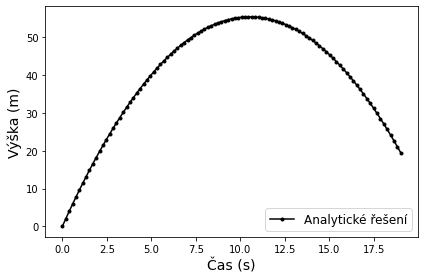

In [3]:
def falling_object_analytic(x0, x1, dt, g=1, steps=100):
    v0 = (x1 - x0) / dt
    t = np.linspace(0, steps, steps+1) * dt
    x = -.5*g*t**2 + v0*t + x0  # the equation of motion
    return t, x

x0, x1 = [0, 2]
dt = 0.19
t_ana, x_ana = falling_object_analytic(x0, x1, dt)

plt.figure()
plt.plot(t_ana, x_ana, 'k.-', label='Analytické řešení')
plt.xlabel('Čas (s)') ; plt.ylabel('Výška (m)') ; plt.legend(fontsize=12)
plt.tight_layout() ; plt.show()

### Numerický přístup

Ne všechny fyzikální problémy mají analytické řešení. Některé, jako dvojité kyvadlo nebo problém tří těles, jsou deterministické, ale chaotické. Jinými slovy, jejich dynamika je předvídatelná, ale nemůžeme znát jejich stav někdy v budoucnu, aniž bychom simulovali všechny zasahující stavy. Ty můžeme řešit numerickou integrací. U těla v gravitačním poli by numerický přístup vypadal takto:

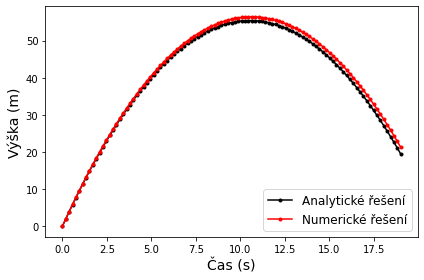

In [4]:
def falling_object_numerical(x0, x1, dt, g=1, steps=100):
    xs = [x0, x1]
    ts = [0, dt]
    v = (x1 - x0) / dt
    x = xs[-1]
    for i in range(steps-1):
        v += -g*dt
        x += v*dt
        xs.append(x)
        ts.append(ts[-1]+dt)
    return np.asarray(ts), np.asarray(xs)

t_num, x_num = falling_object_numerical(x0, x1, dt)

plt.figure()
plt.plot(t_ana, x_ana, 'k.-', label='Analytické řešení')
plt.plot(t_num, x_num, 'r.-', label='Numerické řešení')
plt.xlabel('Čas (s)') ; plt.ylabel('Výška (m)') ; plt.legend(fontsize=12)
plt.tight_layout() ; plt.show()

### Minimalizace akce

**Lagrangeova metoda.** Přístupy, které jsme právě probrali, dávají intuitivní smysl. Proto je učíme v úvodních hodinách fyziky. Existuje však zcela jiný způsob pohledu na dynamiku, který se nazývá Lagrangeova metoda. Lagrangeova metoda lépe popisuje realitu, protože dokáže vytvářet pohybové rovnice pro jakýkoli fyzikální systém. Lagrangiány figurují ve všech čtyřech odvětvích fyziky: klasické mechanice, elektřině a magnetismu, termodynamice a kvantové mechanice. Bez Lagrangianovy metody by fyzici tyto nesourodé obory jen těžko sjednocovali. Ale se [standardním model Lagrangiánu] (https://www.symmetrymagazine.org/article/the-deconstructed-standard-model-equation) dokážou přesně to.

**Jak to funguje.** Lagrangiánská metoda začíná zvážením všech cest, kterými by se fyzický systém mohl vydat z počátečního stavu $\bf x(t_0)$ do konečného stavu $\bf x(t_1)$. Pak poskytuje jednoduché pravidlo pro výběr cesty $\hat{\bf x}$, kterou příroda skutečně provede: akce $S$, definovaná v rovnici níže, musí mít nad touto cestou stacionární hodnotu. Zde $T$ a $V$ jsou funkce kinetické a potenciální energie pro systém v jakémkoli daném čase $t$ v $[t_0,t_1]$.
$$
\begin{aligned}
S &:= \int_{t_0}^{t_1} L({\bf x}, ~ \dot{\bf x}, ~ t) ~ dt
\quad \textrm{where}\quad L = T - V \\
\quad \hat{\bf x} &~~ \textrm{has the property} \quad \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\hat{x}}(t)} \right) = \frac{\partial L}{\partial \hat{x}(t)} \quad \textrm{for} \quad t \in [t_0,t_1]
\end{aligned}
$$
**Nalezení $\hat{\bf x}$ pomocí Euler-Lagrange (co lidé obvykle dělají).** Když je $S$ stacionární, můžeme ukázat, že Euler-Lagrangeova rovnice (druhý řádek výše uvedených rovnic) platí v intervalu $[t_0,t_1]$ (Morin, 2008). Toto pozorování je cenné, protože nám umožňuje řešit pro $\hat{\bf x}$: nejprve aplikujeme Euler-Lagrangeovu rovnici na Lagrangian $L$ a odvodíme systém parciálních diferenciálních rovnic. Potom tyto rovnice integrujeme a získáme $\hat{\bf x}$. Důležité je, že tento přístup funguje pro všechny problémy zahrnující klasickou mechaniku, elektrodynamiku, termodynamiku a teorii relativity. Poskytuje ucelený teoretický rámec pro studium klasické fyziky jako celku.

**Nalezení $\hat{\bf x}$ s minimalizací akce (co budeme dělat).** Přímější přístup k nalezení $\hat{\bf x}$ začíná zjištěním, že cesty stacionární akce jsou téměř vždy _také_ cestami nejméně akce (Morin 2008). Bez velké ztráty obecnosti tedy můžeme vyměnit Euler-Lagrangeovu rovnici za jednoduchý cíl minimalizace uvedený ve třetí části rovnice níže. Mezitím, jak je ukázáno v první části rovnice níže, můžeme předefinovat $S$ jako diskrétní součet přes $N$ rovnoměrně rozložených časových řezů:
$$
S := \sum_{i=0}^{N} L({\bf x}, ~ \dot{{\bf x}}, ~ t_i) \Delta t \quad \textrm{where} \quad \dot{{\bf x}}(t_i) := \frac{ {\bf x}(t_{i+1}) - {\bf x}(t_{i})}{\Delta t} \quad \textrm{and} \quad \hat{\bf x} := \underset{\bf x}{\textrm{argmin}} ~ S(\bf x)
$$
Zůstává jeden problém: po diskretizaci $\hat{ \bf x}$ již nemůžeme vzít jeho derivaci k získání přesné hodnoty pro $\dot{ \bf x}(t_i)$. Místo toho musíme použít aproximaci konečných rozdílů uvedenou v druhé části rovnice výše. Tato aproximace samozřejmě nebude možná pro úplně poslední $\dot{ \bf x}$ v součtu, protože $\dot{ \bf x}_{N+1}$ neexistuje. Pro tuto hodnotu budeme předpokládat, že pro velké $N$ je změna rychlosti v intervalu $\Delta t$ malá a nechť $\dot{ \bf x}_N = \dot{ \bf x}_{N-1}$. Po provedení této poslední aproximace nyní můžeme vypočítat gradient $\frac{\partial S}{\partial {\bf x}}$ numericky a použít jej k minimalizaci $S$. To lze provést pomocí PyTorch (Paszke et al, 2019) nebo jakéhokoli jiného balíčku, který podporuje automatické rozlišování.




In [5]:
def lagrangian_freebody(x, xdot, m=1, g=1):
    T = .5*m*xdot**2
    V = m*g*x
    return T, V
  
def action(x, dt):
    xdot = (x[1:] - x[:-1]) / dt
    xdot = torch.cat([xdot, xdot[-1:]], axis=0)
    T, V = lagrangian_freebody(x, xdot)
    return T.sum()-V.sum()

Nyní hledejme bod stacionární akce. Technicky vzato to může být minimum NEBO inflexní bod. Zde budeme hledat pouze minimum:

In [6]:
import torch
def get_path_between(x, steps=1000, step_size=1e-1, dt=1, num_prints=8, num_stashes=80):
    t = np.linspace(0, len(x)-1, len(x)) * dt
    print_on = np.linspace(0,int(np.sqrt(steps)),num_prints).astype(np.int32)**2 # print more often early in loop
    stash_on = np.linspace(0,int(np.sqrt(steps)),num_stashes).astype(np.int32)**2
    xs = []
    for i in range(steps):
        grad_x = torch.autograd.grad(action(x, dt), x)[0]
        grad_x[[0,-1]] *= 0  # fix first and last coordinates by zeroing their grads
        x.data -= grad_x * step_size

        if i in print_on:
            print('step={:04d}, S={:.4e} J*s'.format(i, action(x, dt).item()))
        if i in stash_on:
            xs.append(x.clone().data.numpy())
    return t, x, np.stack(xs)

Nyní si to všechno spojíme dohromady. Můžeme inicializovat dráhu naší padající částice jako libovolnou náhodnou dráhu prostorem. V níže uvedeném kódu jsme zvolili dráhu, na které částice náhodně poskakuje kolem x=0 až do času t=19 sekund, kdy vyskočí do konečného stavu x = $x_num[-1]$ = 21,3 metru. Tato dráha má velkou akční sílu S = 5425 J-s. Při optimalizaci se tato hodnota plynule snižuje, až se dostaneme na parabolický oblouk s akčním zásahem S = -2500 J-s.



step=0000, S=4.7918e+03 J*s
step=0400, S=-4.3960e+02 J*s


step=1600, S=-1.4792e+03 J*s


step=3600, S=-2.1628e+03 J*s


step=6400, S=-2.4280e+03 J*s


step=10000, S=-2.4900e+03 J*s


step=14400, S=-2.4989e+03 J*s


step=19881, S=-2.4998e+03 J*s


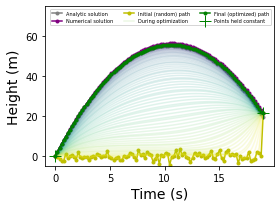

In [7]:
dt = 0.19
x0 = 1.5*torch.randn(len(x_num), requires_grad=True)  # a random path through space
x0[0].data *= 0.0 ; x0[-1].data *= 0.0  # set first and last points to zero
x0[-1].data += x_num[-1]  # set last point to be the end height of the numerical solution

t, x, xs_ncf = get_path_between(x0.clone(), steps=20000, step_size=1e-2, dt=dt)

plt.figure(figsize=[4,3])
# plt.title('Minimizing the Action')
plt.plot(t_ana, x_ana, '.-', color='gray', label='Analytic solution')
plt.plot(t_num, x_num, '.-', color='purple', label='Numerical solution')

plt.plot(t, x0.detach().numpy(), 'y.-', label='Initial (random) path')
for i, xi in enumerate(xs_ncf):
    label = 'During optimization' if i==15 else None
    plt.plot(t, xi, alpha=0.15, color=plt.cm.viridis( 1-i/(len(xs_ncf)-1) ), label=label)
plt.plot(t, x.detach().numpy(), 'g.-', label='Final (optimized) path')
plt.plot(t[[0,-1]], x0.data[[0,-1]], 'g+', markersize=12, label='Points held constant')

plt.ylim(-5, 75)
plt.xlabel('Time (s)') ; plt.ylabel('Height (m)') ; plt.legend(fontsize=5, ncol=3)
plt.tight_layout()  ; plt.show()

In [8]:
def make_video(t, xs, path, interval=60, color='black', mode='ncf', **kwargs): # xs: [time, N, 2]
    fig = plt.gcf() ; fig.set_dpi(200) ; fig.set_size_inches(3, 3)
    camera = Camera(fig)
    for i in range(len(xs) if type(xs) is list else xs.shape[0]):
        if mode == 'ncf':
            for j, xi in enumerate(xs[:i]):
                plt.plot(t, xi, alpha=0.15, color=plt.cm.viridis( 1-j/(len(xs)-1) ), label=label)
            plt.plot(t, xs[0], '.-', color=plt.cm.viridis(0.9))
        plt.plot(t[[0,-1]], xs[-1][[0,-1]], '+', color=color, markersize=16)
        plt.plot(t[:len(xs[i])], xs[i], '.-', color=color)
        plt.xlim(np.min(t)-1, np.max(t)+1) ; plt.ylim(-5, 75)
        plt.xticks([], []); plt.yticks([], []) ; plt.xlabel('Time (s)') ; plt.ylabel('Height (m)')
        camera.snap()
    anim = camera.animate(blit=True, interval=interval, **kwargs)
    anim.save(path) ; plt.close()

MovieWriter stderr:
static/tutorial_ncf.mp4: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x600', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'static/tutorial_ncf.mp4']' returned non-zero exit status 1.

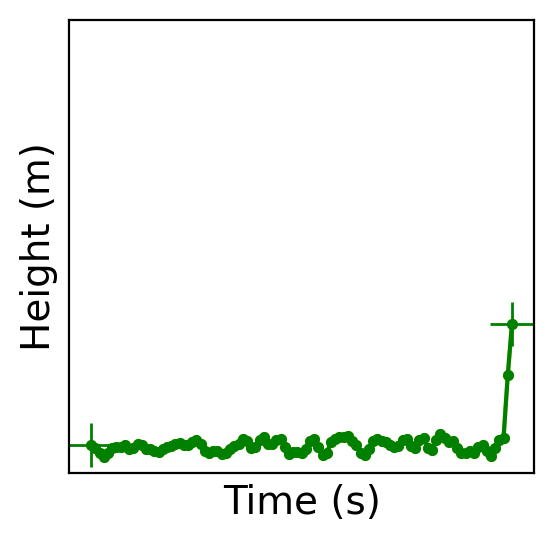

In [9]:
xs_ncf_ = np.concatenate([xs_ncf[:1]]*20+[xs_ncf]+[xs_ncf[-1:]]*20 )
make_video(t, xs_ncf_, path='static/tutorial_ncf.mp4', color='green', interval=80)

mp4 = open('static/tutorial_ncf.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=300 controls><source src="{}" type="video/mp4"></video>'.format(data_url))

In [12]:
xs_ana = [x_ana[:1]]*20 + [x_ana[:i+1] for i in range(len(x_ana)-1)]
xs_ana += [xs_ana[-1]]*20
make_video(t, xs_ana, path='static/tutorial_num.mp4', color='purple', mode='ode', interval=80)
mp4 = open('static/tutorial_num.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=300 controls><source src="{}" type="video/mp4"></video>'.format(data_url))